# Lab 3: Gauss Jordan, Gauss Elimination (Partial Pivoting), Gauss-Seidel, Power Method
This notebook contains Python implementations for:
1. Gauss-Jordan Method
2. Gauss Elimination with Partial Pivoting
3. Gauss-Seidel Method
4. Power Method for Eigenvalue Computation

In [5]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. Gauss-Jordan Method
Solves a system of linear equations using the Gauss-Jordan elimination method.

Gauss-Jordan Solution: [ 2.  3. -1.]


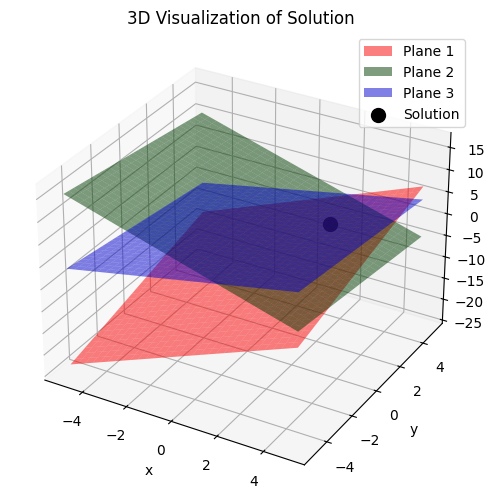

In [8]:
def gauss_jordan(a, b):
    n = len(b)
    aug = np.hstack([a.astype(float), b.reshape(-1, 1)])
    for i in range(n):
        # Partial pivoting
        max_row = np.argmax(abs(aug[i:, i])) + i
        if aug[max_row, i] == 0:
            raise ValueError("Matrix is singular.")
        if max_row != i:
            aug[[i, max_row]] = aug[[max_row, i]]
        aug[i] = aug[i] / aug[i, i]
        for j in range(n):
            if j != i:
                aug[j] = aug[j] - aug[j, i] * aug[i]
    return aug[:, -1]

# Define the system
a = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2.0], [-2.0, 1.0, 2.0]])
b = np.array([8.0, -11.0, -3.0])

# Solve using Gauss-Jordan
sol = gauss_jordan(a, b)
print("Gauss-Jordan Solution:", sol)

# 3D Visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create grid
x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Plane 1: 2x + y - z = 8 => z = 2x + y - 8
Z1 = 2*X + Y - 8
# Plane 2: -3x - y + 2z = -11 => z = (11 - 3*X - Y)/2
Z2 = (11 - 3*X - Y) / 2
# Plane 3: -2x + y + 2z = -3 => z = (3 + 2*X - Y)/2
Z3 = (3 + 2*X - Y) / 2

# Plot the planes
ax.plot_surface(X, Y, Z1, alpha=0.5, color='red', label='Plane 1')
ax.plot_surface(X, Y, Z2, alpha=0.5, color='green', label='Plane 2')
ax.plot_surface(X, Y, Z3, alpha=0.5, color='blue', label='Plane 3')

# Plot the solution point
ax.scatter(sol[0], sol[1], sol[2], color='black', s=100, label='Solution')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Visualization of Solution')
plt.legend()
plt.show()


## 2. Gauss Elimination with Partial Pivoting
Solves a system of linear equations using Gaussian elimination with partial pivoting.

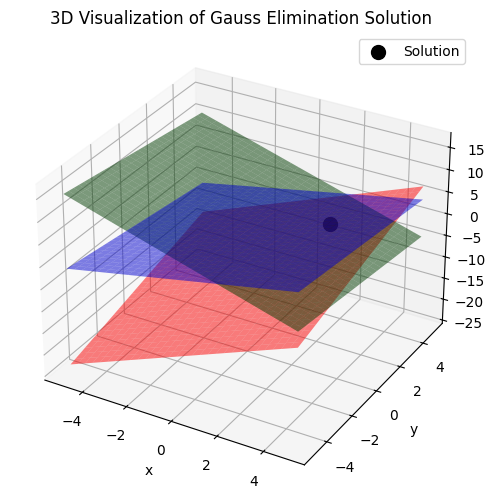

In [9]:
def gauss_elimination_partial_pivot(a, b):
    n = len(b)
    a = a.astype(float)
    b = b.astype(float)
    for i in range(n):
        max_row = np.argmax(abs(a[i:, i])) + i
        if a[max_row, i] == 0:
            raise ValueError("Matrix is singular.")
        if max_row != i:
            a[[i, max_row]] = a[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
        for j in range(i+1, n):
            factor = a[j, i] / a[i, i]
            a[j, i:] -= factor * a[i, i:]
            b[j] -= factor * b[i]
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(a[i, i+1:], x[i+1:])) / a[i, i]
    return x


# 3D Visualization for Gauss Elimination Solution

# Define the system
a = np.array([[2.0, 1.0, -1.0], [-3.0, -1.0, 2.0], [-2.0, 1.0, 2.0]])
b = np.array([8.0, -11.0, -3.0])
sol = gauss_elimination_partial_pivot(a, b)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_vals = np.linspace(-5, 5, 30)
y_vals = np.linspace(-5, 5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

Z1 = 2*X + Y - 8
Z2 = (11 - 3*X - Y) / 2
Z3 = (3 + 2*X - Y) / 2

ax.plot_surface(X, Y, Z1, alpha=0.5, color='red')
ax.plot_surface(X, Y, Z2, alpha=0.5, color='green')
ax.plot_surface(X, Y, Z3, alpha=0.5, color='blue')

ax.scatter(sol[0], sol[1], sol[2], color='black', s=100, label='Solution')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D Visualization of Gauss Elimination Solution')
plt.legend()
plt.show()

## 3. Gauss Seidal Method
Iterative technique that modifies an initial guess for solution vector to approach the true solution of the system of equations.

Gauss-Seidel Solution: [0.50000026 0.9999999  0.49999995]


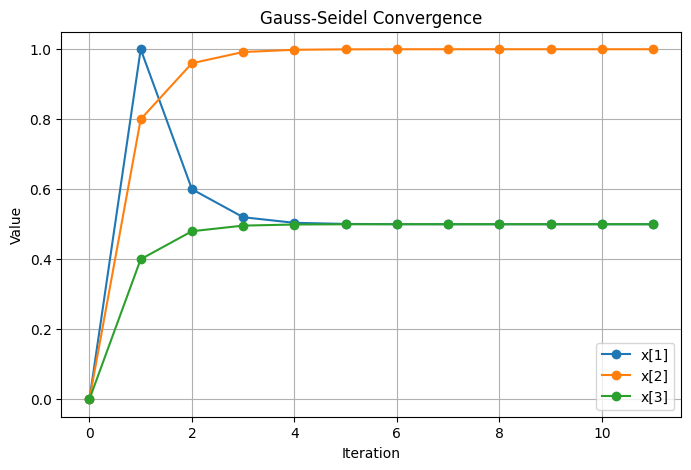

In [ ]:

def gauss_seidel(a, b, x0=None, tol=1e-6, max_iter=100):
    n = len(b)
    x = np.zeros(n) if x0 is None else x0.copy()
    history = [x.copy()]
    for itr in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(a[i, :i], x_new[:i])
            s2 = np.dot(a[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / a[i, i]
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new
    return x, np.array(history)

# Example system
a = np.array([[4.0, 1.0, 2.0],
              [3.0, 5.0, 1.0],
              [1.0, 1.0, 3.0]])
b = np.array([4.0, 7.0, 3.0])

sol, hist = gauss_seidel(a, b)

print("Gauss-Seidel Solution:", sol)

# Visualization of convergence
plt.figure(figsize=(8, 5))
for i in range(hist.shape[1]):
    plt.plot(hist[:, i], marker='o', label=f'x[{i+1}]')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Gauss-Seidel Convergence')
plt.legend()
plt.grid(True)
plt.show()



## 4. Power Method
Finds the largest eigenvalue and corresponding eigenvector of a matrix.

Largest Eigenvalue: 3.6180339887802426
Corresponding Eigenvector: [0.61803399 1.        ]


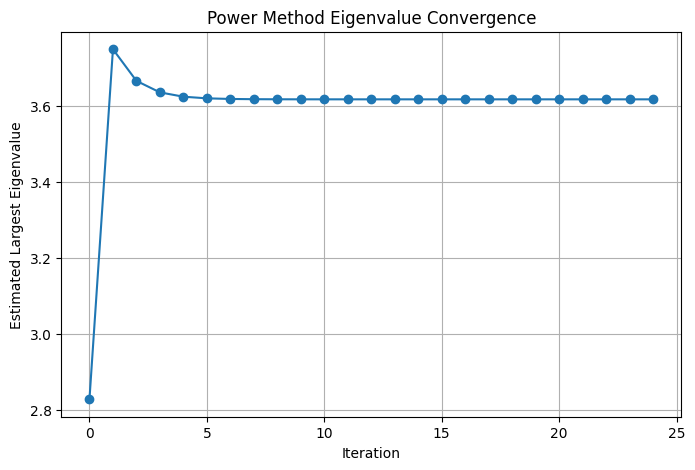

In [14]:
def power_method(a, x0=None, tol=1e-10, max_iter=100):
    n = a.shape[0]
    x = np.ones(n) if x0 is None else x0.copy()
    x = x / np.linalg.norm(x)
    lambda_old = 0
    lambda_hist = []
    for _ in range(max_iter):
        x_new = np.dot(a, x)
        lambda_new = np.max(np.abs(x_new))
        x_new = x_new / lambda_new
        lambda_hist.append(lambda_new)
        if np.abs(lambda_new - lambda_old) < tol:
            return lambda_new, x_new, lambda_hist
        x = x_new
        lambda_old = lambda_new
    raise Exception("Power method did not converge")

# Example usage:
a = np.array([[2.0, 1.0], [1.0, 3.0]])
lambda1, v1, lambda_hist = power_method(a)
print("Largest Eigenvalue:", lambda1)
print("Corresponding Eigenvector:", v1)

# Visualization of eigenvalue convergence
plt.figure(figsize=(8, 5))
plt.plot(lambda_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Estimated Largest Eigenvalue')
plt.title('Power Method Eigenvalue Convergence')
plt.grid(True)
plt.show()